## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0717 22:59:53.528054  1820 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 22:59:53.575335  1820 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 22:59:53.589639  1820 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [6]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0717 23:02:13.881283  1820 deprecation.py:323] From C:\Users\weihs\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0717 23:02:14.000847  1820 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 15s 298us/step - loss: 1.8738 - acc: 0.3295 - val_loss: 1.8601 - val_acc: 0.3364
Epoch 2/500
50000/50000 [==============================] - 14s 278us/step - loss: 1.6549 - acc: 0.4145 - val_loss: 1.6903 - val_acc: 0.3960
Epoch 3/500
50000/50000 [==============================] - 14s 274us/step - loss: 1.5646 - acc: 0.4440 - val_loss: 1.6719 - val_acc: 0.3919
Epoch 4/500
50000/50000 [==============================] - 14s 279us/step - loss: 1.5020 - acc: 0.4681 - val_loss: 1.5638 - val_acc: 0.4427
Epoch 5/500
50000/50000 [==============================] - 16s 314us/step - loss: 1.4511 - acc: 0.4852 - val_loss: 1.6085 - val_acc: 0.4314
Epoch 6/500
50000/50000 [==============================] - 16s 311us/step - loss: 1.4145 - acc: 0.4984 - val_loss: 1.4676 - val_acc: 0.4719
Epoch 7/500
50000/50000 [==============================] - 15s 308us/step - loss: 1.3704 - acc: 0.5131 - val_l

Epoch 59/500
50000/50000 [==============================] - 26s 520us/step - loss: 0.3051 - acc: 0.8916 - val_loss: 2.1770 - val_acc: 0.5360
Epoch 60/500
50000/50000 [==============================] - 27s 540us/step - loss: 0.2953 - acc: 0.8963 - val_loss: 2.3140 - val_acc: 0.5308
Epoch 61/500
50000/50000 [==============================] - 27s 537us/step - loss: 0.2769 - acc: 0.9027 - val_loss: 2.2686 - val_acc: 0.5310
Epoch 62/500
50000/50000 [==============================] - 26s 529us/step - loss: 0.2587 - acc: 0.9104 - val_loss: 2.3829 - val_acc: 0.5214
Epoch 63/500
50000/50000 [==============================] - 26s 528us/step - loss: 0.2499 - acc: 0.9126 - val_loss: 2.4186 - val_acc: 0.5311
Epoch 64/500
50000/50000 [==============================] - 27s 542us/step - loss: 0.2477 - acc: 0.9136 - val_loss: 2.4415 - val_acc: 0.5312
Epoch 65/500
50000/50000 [==============================] - 27s 533us/step - loss: 0.2384 - acc: 0.9161 - val_loss: 2.6641 - val_acc: 0.4937
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 23s 460us/step - loss: 0.0939 - acc: 0.9671 - val_loss: 3.5055 - val_acc: 0.5335
Epoch 118/500
50000/50000 [==============================] - 23s 455us/step - loss: 0.0894 - acc: 0.9689 - val_loss: 3.4498 - val_acc: 0.5401
Epoch 119/500
50000/50000 [==============================] - 23s 456us/step - loss: 0.0722 - acc: 0.9751 - val_loss: 3.5081 - val_acc: 0.5338
Epoch 120/500
50000/50000 [==============================] - 23s 460us/step - loss: 0.0611 - acc: 0.9787 - val_loss: 3.4898 - val_acc: 0.5341
Epoch 121/500
50000/50000 [==============================] - 23s 451us/step - loss: 0.0760 - acc: 0.9733 - val_loss: 3.6765 - val_acc: 0.5240
Epoch 122/500
50000/50000 [==============================] - 23s 456us/step - loss: 0.0752 - acc: 0.9739 - val_loss: 3.5622 - val_acc: 0.5388
Epoch 123/500
50000/50000 [==============================] - 23s 466us/step - loss: 0.0711 - acc: 0.9758 - val_loss: 3.5985 - val_acc: 0.5276
Epoch 

50000/50000 [==============================] - 23s 454us/step - loss: 7.0173e-04 - acc: 1.0000 - val_loss: 3.9354 - val_acc: 0.5523
Epoch 175/500
50000/50000 [==============================] - 23s 460us/step - loss: 5.9795e-04 - acc: 1.0000 - val_loss: 3.9344 - val_acc: 0.5535
Epoch 176/500
50000/50000 [==============================] - 23s 464us/step - loss: 6.4633e-04 - acc: 1.0000 - val_loss: 3.9438 - val_acc: 0.5517
Epoch 177/500
50000/50000 [==============================] - 23s 456us/step - loss: 5.6536e-04 - acc: 1.0000 - val_loss: 3.9497 - val_acc: 0.5516
Epoch 178/500
50000/50000 [==============================] - 23s 457us/step - loss: 5.0264e-04 - acc: 1.0000 - val_loss: 3.9474 - val_acc: 0.5527
Epoch 179/500
50000/50000 [==============================] - 23s 467us/step - loss: 6.1581e-04 - acc: 1.0000 - val_loss: 3.9582 - val_acc: 0.5517
Epoch 180/500
50000/50000 [==============================] - 23s 454us/step - loss: 5.9279e-04 - acc: 1.0000 - val_loss: 3.9533 - val_acc:

50000/50000 [==============================] - 23s 459us/step - loss: 1.8975e-04 - acc: 1.0000 - val_loss: 4.0919 - val_acc: 0.5545
Epoch 231/500
50000/50000 [==============================] - 23s 454us/step - loss: 1.8941e-04 - acc: 1.0000 - val_loss: 4.0940 - val_acc: 0.5547
Epoch 232/500
50000/50000 [==============================] - 23s 455us/step - loss: 1.8728e-04 - acc: 1.0000 - val_loss: 4.0946 - val_acc: 0.5549
Epoch 233/500
50000/50000 [==============================] - 23s 455us/step - loss: 1.8564e-04 - acc: 1.0000 - val_loss: 4.0959 - val_acc: 0.5547
Epoch 234/500
50000/50000 [==============================] - 23s 457us/step - loss: 1.8468e-04 - acc: 1.0000 - val_loss: 4.0978 - val_acc: 0.5544
Epoch 235/500
50000/50000 [==============================] - 23s 466us/step - loss: 1.8176e-04 - acc: 1.0000 - val_loss: 4.0971 - val_acc: 0.5546
Epoch 236/500
50000/50000 [==============================] - 23s 460us/step - loss: 1.8022e-04 - acc: 1.0000 - val_loss: 4.0998 - val_acc:

50000/50000 [==============================] - 23s 456us/step - loss: 1.2654e-04 - acc: 1.0000 - val_loss: 4.1558 - val_acc: 0.5550
Epoch 287/500
50000/50000 [==============================] - 23s 455us/step - loss: 1.2588e-04 - acc: 1.0000 - val_loss: 4.1574 - val_acc: 0.5550
Epoch 288/500
50000/50000 [==============================] - 23s 461us/step - loss: 1.2392e-04 - acc: 1.0000 - val_loss: 4.1575 - val_acc: 0.5548
Epoch 289/500
50000/50000 [==============================] - 23s 462us/step - loss: 1.2420e-04 - acc: 1.0000 - val_loss: 4.1581 - val_acc: 0.5549
Epoch 290/500
50000/50000 [==============================] - 23s 468us/step - loss: 1.2268e-04 - acc: 1.0000 - val_loss: 4.1582 - val_acc: 0.5551
Epoch 291/500
50000/50000 [==============================] - 23s 463us/step - loss: 1.2252e-04 - acc: 1.0000 - val_loss: 4.1603 - val_acc: 0.5554
Epoch 292/500
50000/50000 [==============================] - 23s 460us/step - loss: 1.2247e-04 - acc: 1.0000 - val_loss: 4.1619 - val_acc:

50000/50000 [==============================] - 23s 460us/step - loss: 9.5673e-05 - acc: 1.0000 - val_loss: 4.1974 - val_acc: 0.5549
Epoch 343/500
50000/50000 [==============================] - 23s 455us/step - loss: 9.5776e-05 - acc: 1.0000 - val_loss: 4.1990 - val_acc: 0.5557
Epoch 344/500
50000/50000 [==============================] - 23s 460us/step - loss: 9.5119e-05 - acc: 1.0000 - val_loss: 4.1999 - val_acc: 0.5555
Epoch 345/500
50000/50000 [==============================] - 23s 462us/step - loss: 9.4629e-05 - acc: 1.0000 - val_loss: 4.2009 - val_acc: 0.5550
Epoch 346/500
50000/50000 [==============================] - 24s 472us/step - loss: 9.4452e-05 - acc: 1.0000 - val_loss: 4.1999 - val_acc: 0.5550
Epoch 347/500
50000/50000 [==============================] - 23s 463us/step - loss: 9.3823e-05 - acc: 1.0000 - val_loss: 4.2012 - val_acc: 0.5555
Epoch 348/500
50000/50000 [==============================] - 23s 461us/step - loss: 9.3513e-05 - acc: 1.0000 - val_loss: 4.2014 - val_acc:

50000/50000 [==============================] - 23s 462us/step - loss: 7.7886e-05 - acc: 1.0000 - val_loss: 4.2292 - val_acc: 0.5551
Epoch 399/500
50000/50000 [==============================] - 23s 458us/step - loss: 7.7689e-05 - acc: 1.0000 - val_loss: 4.2295 - val_acc: 0.5554
Epoch 400/500
50000/50000 [==============================] - 23s 460us/step - loss: 7.7330e-05 - acc: 1.0000 - val_loss: 4.2306 - val_acc: 0.5555
Epoch 401/500
50000/50000 [==============================] - 23s 466us/step - loss: 7.7269e-05 - acc: 1.0000 - val_loss: 4.2309 - val_acc: 0.5553
Epoch 402/500
50000/50000 [==============================] - 23s 464us/step - loss: 7.7075e-05 - acc: 1.0000 - val_loss: 4.2315 - val_acc: 0.5561
Epoch 403/500
50000/50000 [==============================] - 23s 458us/step - loss: 7.6827e-05 - acc: 1.0000 - val_loss: 4.2311 - val_acc: 0.5558
Epoch 404/500
50000/50000 [==============================] - 23s 459us/step - loss: 7.6371e-05 - acc: 1.0000 - val_loss: 4.2317 - val_acc:

50000/50000 [==============================] - 23s 456us/step - loss: 6.5865e-05 - acc: 1.0000 - val_loss: 4.2542 - val_acc: 0.5548
Epoch 455/500
50000/50000 [==============================] - 23s 460us/step - loss: 6.5827e-05 - acc: 1.0000 - val_loss: 4.2543 - val_acc: 0.5559
Epoch 456/500
50000/50000 [==============================] - 23s 468us/step - loss: 6.5633e-05 - acc: 1.0000 - val_loss: 4.2540 - val_acc: 0.5559
Epoch 457/500
50000/50000 [==============================] - 23s 464us/step - loss: 6.5517e-05 - acc: 1.0000 - val_loss: 4.2560 - val_acc: 0.5554
Epoch 458/500
50000/50000 [==============================] - 24s 473us/step - loss: 6.5304e-05 - acc: 1.0000 - val_loss: 4.2558 - val_acc: 0.5554
Epoch 459/500
50000/50000 [==============================] - 25s 497us/step - loss: 6.5137e-05 - acc: 1.0000 - val_loss: 4.2560 - val_acc: 0.5556
Epoch 460/500
50000/50000 [==============================] - 23s 466us/step - loss: 6.4997e-05 - acc: 1.0000 - val_loss: 4.2555 - val_acc:

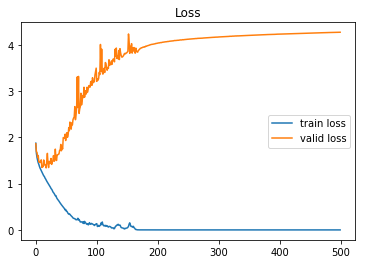

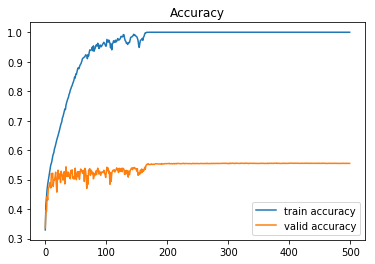

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()